# Haunted Places
'haunted_places.csv' source: https://www.kaggle.com/datasets/sujaykapadnis/haunted-places

# 1. About Us, About the Data, Define Objectives/Questions
### Scenario/About Us:
- We are working with a company that does haunted tours. Using this data, we will conduct an investigation into the most haunted city/cities which should be invested in by the company.  
### About the Data: 
### Objectives: 
### Questions:

### Running ideas:
- Possibly use a "tourism by city" dataset to supplement this.  
- Yelp/TripAdvisor reviews?  

- possible questions?:
1. What are top cities for paranormal activity?  
2. What are the top cities for overall travel/tourism within the US?  
3. Can a few cities be chosen so we can come up with proposals of haunted tours in these places?  

# Data Acquisition
preview of `haunted_places.csv`:

In [7]:
import pandas as pd
haunted_places = pd.read_csv('haunted_places.csv')
haunted_places.head()

,city,country,description,location,state,state_abbrev,longitude,latitude,city_longitude,city_latitude
0,Ada,United States,Ada witch - Sometimes you can see a misty blue...,Ada Cemetery,Michigan,MI,-85.504893,42.962106,-85.495480,42.960727
1,Addison,United States,A little girl was killed suddenly while waitin...,North Adams Rd.,Michigan,MI,-84.381843,41.971425,-84.347168,41.986434
2,Adrian,United States,If you take Gorman Rd. west towards Sand Creek...,Ghost Trestle,Michigan,MI,-84.035656,41.904538,-84.037166,41.897547
3,Adrian,United States,"In the 1970's, one room, room 211, in the old ...",Siena Heights University,Michigan,MI,-84.017565,41.905712,-84.037166,41.897547
4,Albion,United States,Kappa Delta Sorority - The Kappa Delta Sororit...,Albion College,Michigan,MI,-84.745177,42.244006,-84.753030,42.243097


In [11]:
yelp = pd.read_csv('yelp_review_polarity_csv/train.csv')
yelp.head()

,1,"Unfortunately, the frustration of being Dr. Goldberg's patient is a repeat of the experience I've had with so many other doctors in NYC -- good doctor, terrible staff. It seems that his staff simply never answers the phone. It usually takes 2 hours of repeated calling to get an answer. Who has time for that or wants to deal with it? I have run into this problem with many other doctors and I just don't get it. You have office workers, you have patients with medical needs, why isn't anyone answering the phone? It's incomprehensible and not work the aggravation. It's with regret that I feel that I have to give Dr. Goldberg 2 stars."
0,2,Been going to Dr. Goldberg for over 10 years. ...
1,1,I don't know what Dr. Goldberg was like before...
2,1,I'm writing this review to give you a heads up...
3,2,All the food is great here. But the best thing...
4,1,Wing sauce is like water. Pretty much a lot of...


In [2]:
haunted_places.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10992 entries, 0 to 10991
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   city            10989 non-null  object 
 1   country         10992 non-null  object 
 2   description     10992 non-null  object 
 3   location        10989 non-null  object 
 4   state           10992 non-null  object 
 5   state_abbrev    10992 non-null  object 
 6   longitude       9731 non-null   float64
 7   latitude        9731 non-null   float64
 8   city_longitude  10963 non-null  float64
 9   city_latitude   10963 non-null  float64
dtypes: float64(4), object(6)
memory usage: 858.9+ KB


variables:  
`city`: the city where the place is located.  
`country`: the country where the place is located (always "United States")  
`description`: A text description of the place. The amount of detail in these descriptions is highly variable.  
`location`: A title for the haunted place.  
`state`: The US state where the place is located.  
`state_abbrev`: the two-letter abbreviation for the state.  
`longitude`: Longitude of the place.  
`latitude`: Latitude of the place.  
`city_longitude`: Longitude of the city center.  
`city_latitude`: Latitude of the city center.  

# Initial Data Exploration
1. **check dataset shape**  
2. **check data types**  
3. **obtain basic statistics for quantitative/numeric columns**
4. **check out the unique number and type for categorical columns (where reasonable)**  

In [4]:
# Get the size of the dataset
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\nThere are " + str(haunted_places.shape[1]) + " columns and " + str(haunted_places.shape[0]) + " rows.\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
There are 10 columns and 10992 rows.
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



In [13]:
# Display data types
haunted_places.dtypes

city               object
country            object
description        object
location           object
state              object
state_abbrev       object
longitude         float64
latitude          float64
city_longitude    float64
city_latitude     float64
dtype: object

In [14]:
# Display descriptive statistics for numerical columns
haunted_places.describe()

,longitude,latitude,city_longitude,city_latitude
count,9731.000000,9731.000000,10963.000000,10963.000000
mean,-91.996655,38.342790,-91.909268,38.376575
std,17.686038,5.259289,16.401246,5.067072
min,-164.722410,-45.023726,-164.723889,19.575619
25%,-99.119403,34.676030,-98.493387,34.737780
50%,-87.231215,39.279584,-87.090277,39.283397
75%,-80.303764,41.873400,-80.505896,41.847006
max,168.697269,66.892589,-67.840232,66.898333


In [25]:
# Display the number of uniques for each categorical column, where it makes sense
print("There are " + str(haunted_places['city'].nunique()) + " cities in `city`. ")
print("There are " + str(haunted_places['country'].nunique()) + " countries in `country`. ")
print("There are " + str(haunted_places['state'].nunique()) + " states in `state`. ")
print("There are " + str(haunted_places['state_abbrev'].nunique()) + " state abbreviations in `state_abbrev`. ")

There are 4385 cities in `city`. 
There are 1 countries in `country`. 
There are 51 states in `state`. 
There are 51 state abbreviations in `state_abbrev`. 


## Here are the findings of the initial exploration:  
### Dataset Size: 
- rows (haunted places): 10992
- columns (variables): 10

### Data Types:

- **Numerical Data (int64 or float64):** `longitude`, `latitude`, `city_longitude`, `city_latitude`
- **Categorical Data (object)** `city`, `country`, `state`, `state_abbrev`
- **Boolean Data (bool):** none  

### Basic Statistics:
For the numerical columns:
- `longitude`: 
- `latitude`: 
- `city_longitude`: 
- `city_latituce`: 

# Data Cleansing: 
1. identify **missing values** and decide whether to impute, fill, or drop.

2. check for and remove **duplicates**.

3. ensure that each column is of the correct **data type**, and convert if not.

4. look for **outliers** using statistical methods or visualization.  

In [5]:
# Check for missing values
missing_values = haunted_places.isnull().sum()

# Calculate missing value counts
missing_values = pd.DataFrame(missing_values[missing_values > 0])

# Calculate missing percent of values for each column
missing_pct = ((missing_values/haunted_places.shape[0]*100).round(3))

# Add missing count and percent to table
missing_values["% Missing"] = missing_pct
missing_values.rename(columns={0: 'Count Missing'}, inplace=True)
missing_values

,Count Missing,% Missing
city,3,0.027
location,3,0.027
longitude,1261,11.472
latitude,1261,11.472
city_longitude,29,0.264
city_latitude,29,0.264


<Axes: >

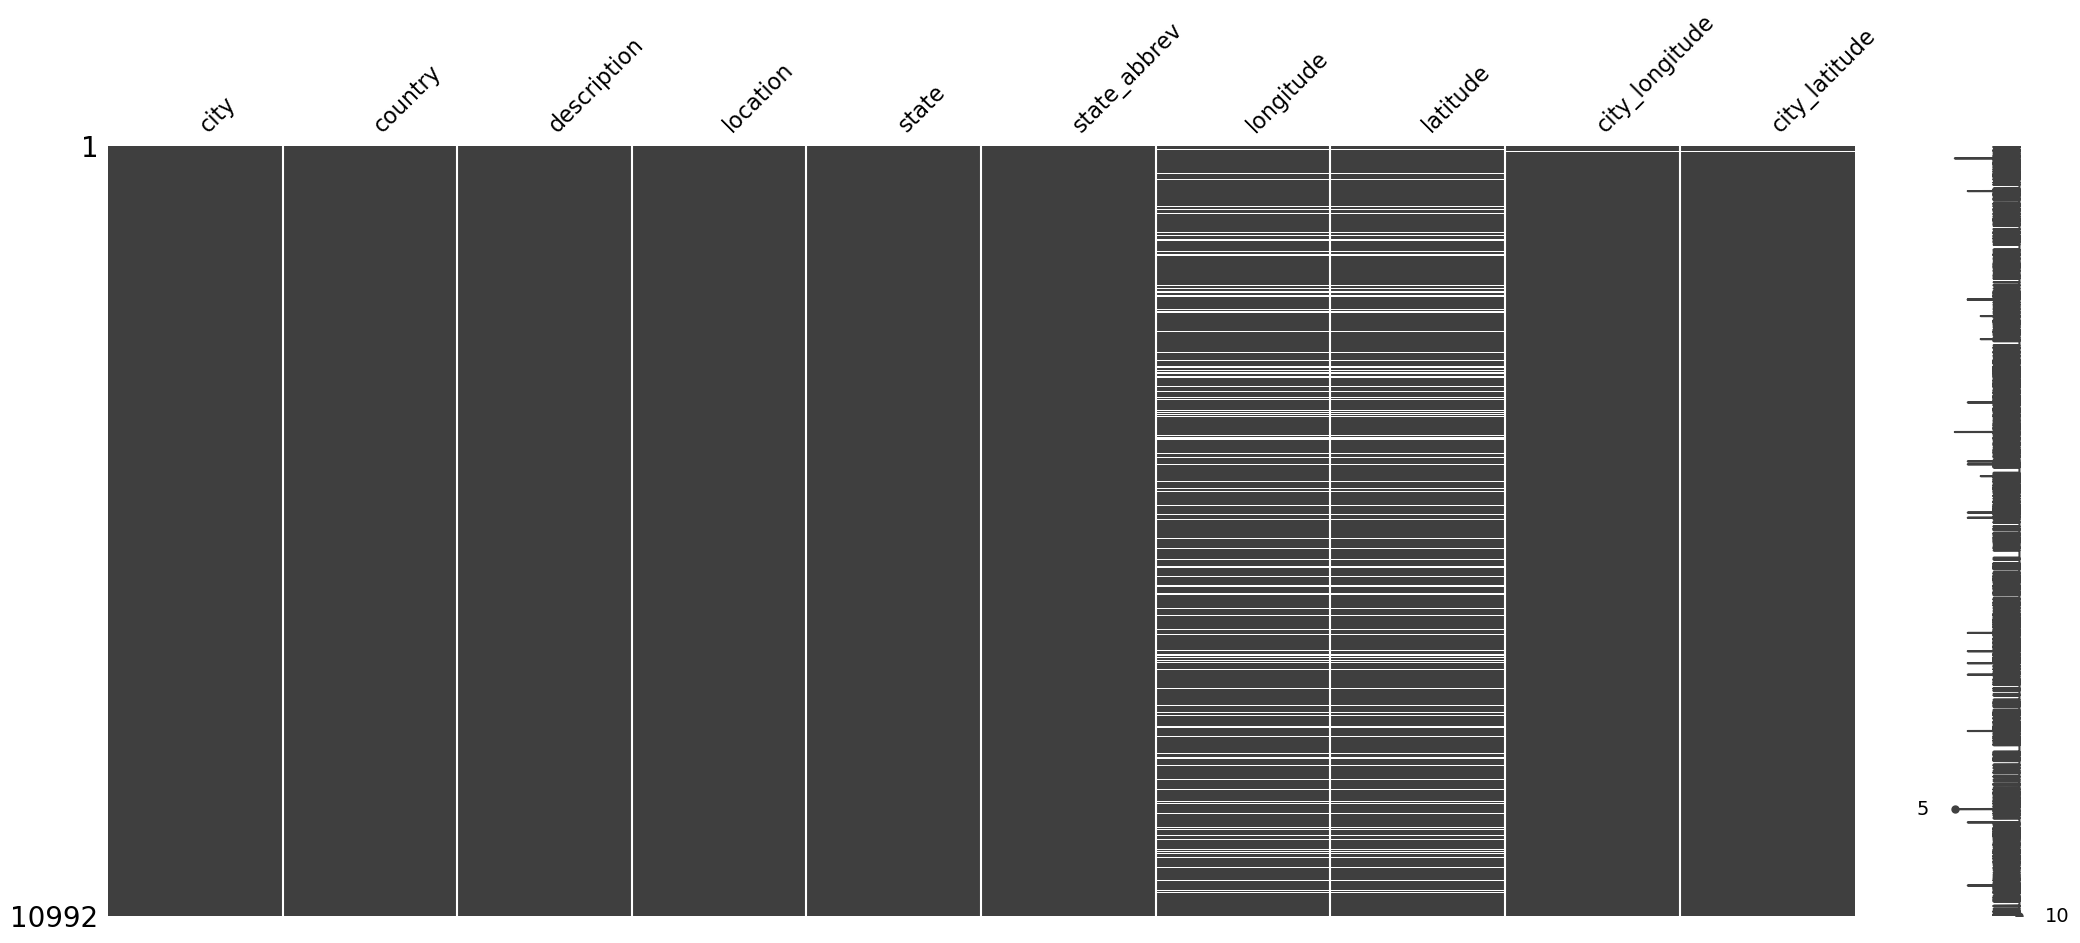

In [42]:
# Visualize missing values
import missingno as msno
msno.matrix(haunted_places)

**Analyzing missing values:**  
columns with missing values:
-  `city` and `location` are both missing 3 values each (or 0.027%).  
- `longitude` and `latitude` are both missing 1,261 values each (about 11%).  
- `city_longitude` and `city_latitude` are both missing 29 values each (about 0.264%).  

how we will handle these:
- Since `city` and `location` together make up less than 0.06% of data, we can go ahead and drop these.  
-  for `longitude` and `latitude`, we will check to see if there exists a corresponding `city_longitude` and `city_latitude` for each. If so, we will grab that value and fill with it. We can do the same but backwards for `city_longitude` and `city_latitude`. Whatever is left, we can drop.  

First we drop missing rows in `city` and `location`:

In [68]:
# Drop NA values from `city`
haunted_places.dropna(subset=['city'], inplace=True)

# Drop NA values from `location`
haunted_places.dropna(subset=['location'], inplace=True)

# Display updated missing values
haunted_places.isnull().sum()

city               0
country            0
description        0
location           0
state              0
state_abbrev       0
longitude         15
latitude          15
city_longitude    15
city_latitude     15
dtype: int64

Now, let's try to fill as many `longitude` and `latitude` values as possible using lambda functions. 

In [69]:
# Iterate through `longitude` and check for missing values 
haunted_places['longitude'] = haunted_places.apply(
    # For each row in `city_longitude` which is filled, fill `longitude` with it, and leave alone otherwise
    lambda row: row['city_longitude'] if pd.isnull(row['longitude']) else row['longitude'],
    axis=1
)

# Iterate through `latitude` and check for missing values 
haunted_places['latitude'] = haunted_places.apply(
    # For each row in `city_latitude` which is filled, fill `latitude` with it, and leave alone otherwise
    lambda row: row['city_latitude'] if pd.isnull(row['latitude']) else row['latitude'],
    axis=1
)

# print the new count on missing values
longitude_remaining = haunted_places['longitude'].isnull().sum()
print("There are " + str(longitude_remaining) + " nulls left in `longitude`.")
latitude_remaining = haunted_places['latitude'].isnull().sum()
print("There are " + str(latitude_remaining) + " nulls left in `latitude`.")

There are 15 nulls left in `longitude`.
There are 15 nulls left in `latitude`.


do the same with `city_longitude` and `city_latitude`.  

In [70]:
# Iterate through `city_longitude` and check for missing values 
haunted_places['city_longitude'] = haunted_places.apply(
    # For each row in `longitude` which is filled, fill `city_longitude` with it, and leave alone otherwise
    lambda row: row['longitude'] if pd.isnull(row['city_longitude']) else row['city_longitude'],
    axis=1
)

# Iterate through `city_latitude` and check for missing values 
haunted_places['city_latitude'] = haunted_places.apply(
    # For each row in `latitude` which is filled, fill `city_latitude` with it, and leave alone otherwise
    lambda row: row['latitude'] if pd.isnull(row['city_latitude']) else row['city_latitude'],
    axis=1
)

# print the new count on missing values
city_longitude_remaining = haunted_places['city_longitude'].isnull().sum()
print("There are " + str(city_longitude_remaining) + " nulls left in `city_longitude`.")
city_latitude_remaining = haunted_places['city_latitude'].isnull().sum()
print("There are " + str(city_latitude_remaining) + " nulls left in `city_latitude`.")

There are 15 nulls left in `city_longitude`.
There are 15 nulls left in `city_latitude`.


Both `longitude` and `latitude`, as well as `city_longitude` and `city_latitude` have 15 values left. Let's check them to be sure they are all the same:  

In [71]:
haunted_places[haunted_places['longitude'].isnull()]

,city,country,description,location,state,state_abbrev,longitude,latitude,city_longitude,city_latitude
643,Darktown,United States,"Reports of trolls, Hellhounds, human forms, ac...","""THE ALAMO""",Pennsylvania,PA,NaN,NaN,NaN,NaN
2188,Saddle Community,United States,Old timers tell of a haunting on 9 Mile Ridge ...,9 Mile Ridge,Arkansas,AR,NaN,NaN,NaN,NaN
2196,Tazlina,United States,The Tazlina Lodge is not in use anymore. Long ...,Tazlina Lodge,Arkansas,AR,NaN,NaN,NaN,NaN
3660,Fort Defiance,United States,The school gym is haunted by several children ...,Tse Ho Tso Middle School,Alabama,AL,NaN,NaN,NaN,NaN
4501,Akra/Leroy,United States,it's to be said that a lady has been seen with...,Road between Akra and Leroy,North Dakota,ND,NaN,NaN,NaN,NaN
4543,Mandan outskirts,United States,The spirit of the wives of the soldiers who we...,Custer House boardwalk,North Dakota,ND,NaN,NaN,NaN,NaN
5232,Diphtheria Hill,United States,An old cemetery on a hill near Clay Center whe...,Clay Center,Kansas,KS,NaN,NaN,NaN,NaN
5306,Rural Niotaze,United States,El Cado Cemetery - Witnesses claim to have see...,The Sandhills,Kansas,KS,NaN,NaN,NaN,NaN
6950,Harpo Studios,United States,Was the sight of a makeshift morgue after the ...,formerly the Chicago armory,Illinois,IL,NaN,NaN,NaN,NaN
7211,Reedsville,United States,Well as it is told if you go to the bridge and...,Dick Huffman bridge,Indiana,IN,NaN,NaN,NaN,NaN


The dataframe shows that there are NaNs for all four columns in question, meaning that these remaining 15 values can now be dropped, now that we know there is no latitude/longitude available to fill in either direction.  

In [72]:
# Drop NA values from longitude
haunted_places.dropna(subset=['longitude'], inplace=True)

# Display updated missing values
haunted_places.isnull().sum()

city              0
country           0
description       0
location          0
state             0
state_abbrev      0
longitude         0
latitude          0
city_longitude    0
city_latitude     0
dtype: int64

now that missing values have been handled, we'll check for duplicates. 


In [73]:
# Check for duplicate rows
duplicate_rows = haunted_places.duplicated().sum()
print("There are " + str(duplicate_rows) + " duplicate row(s).\n")

# Get a boolean series indicating which rows are duplicates (including the original rows)
duplicate_mask_all = haunted_places.duplicated(keep=False)

# Use this mask to filter and display both the original and duplicate rows
duplicate_rows_all_df = haunted_places[duplicate_mask_all]
duplicate_rows_all_df

There are 2 duplicate row(s).



,city,country,description,location,state,state_abbrev,longitude,latitude,city_longitude,city_latitude
1445,Chestnut Hill,United States,Students have reported lights along the pathwa...,Pine Manor College,Massachusetts,MA,-71.157477,42.319909,-71.166187,42.330380
1453,Chestnut Hill,United States,Students have reported lights along the pathwa...,Pine Manor College,Massachusetts,MA,-71.157477,42.319909,-71.166187,42.330380
6821,Fort Wayne,United States,It is believed that Carroll High School is cur...,Carroll High School,Indiana,IN,-85.192519,41.190347,-85.139351,41.079273
6824,Fort Wayne,United States,It is believed that Carroll High School is cur...,Carroll High School,Indiana,IN,-85.192519,41.190347,-85.139351,41.079273


There are 2 duplicates to remove.  

In [74]:
# Remove duplicate rows, if any
if duplicate_rows > 0: 
    haunted_places.drop_duplicates(inplace=True)

# Verify that the removal worked
duplicate_rows = haunted_places.duplicated().sum()
print("There are now " + str(duplicate_rows) + " duplicate row(s).\n")

There are now 0 duplicate row(s).



now let's determine if any data types need conversion.


In [10]:
# Display data types for each column
haunted_places.dtypes

city               object
country            object
description        object
location           object
state              object
state_abbrev       object
longitude         float64
latitude          float64
city_longitude    float64
city_latitude     float64
dtype: object

All data types look good. Next, let's do a quick check for outliers using box plots for each numerical column:

# Exploratory Data Analysis

### 1. quick feature creation to aid in analysis
- Create a set of US regions by mapping states to regions.  


### 2. visualization
**Univariate**  
- Frequency of observations across US regions.  
- Map of regions with top n observations.
- Frequency of observations across top n states.  
- Map of states with top n observations.    
- Frequency of observations for top n cities.  
- Map of cities with top n observations.  

**bivariate**  
- Visualize `longitude` vs `latitude` on a map.  
- Visualize `city_longitude` vs `city_latitude` on a map.  *Maybe: find out what the difference is between these, and possibly choose one or the other to use if they're similar enough?*  

**multivariate**    
- Plot either `longitude` and `latituce` or `city_longitude` and `city_latitude` over map of top states.  
- Plot either `longitude` and `latituce` or `city_longitude` and `city_latitude` over map of top cities.  

### 3. statistical analysis
**ANOVA**  
- After finding counts for top n regions, states, cities, produce boxplots for each n to visualize the differences.  
- Determine if significant difference exists between the mean number of observations for each state and city.  

### 4. relationships between variables


### 2. visualization
frequency of observations by `state_abbrev`:

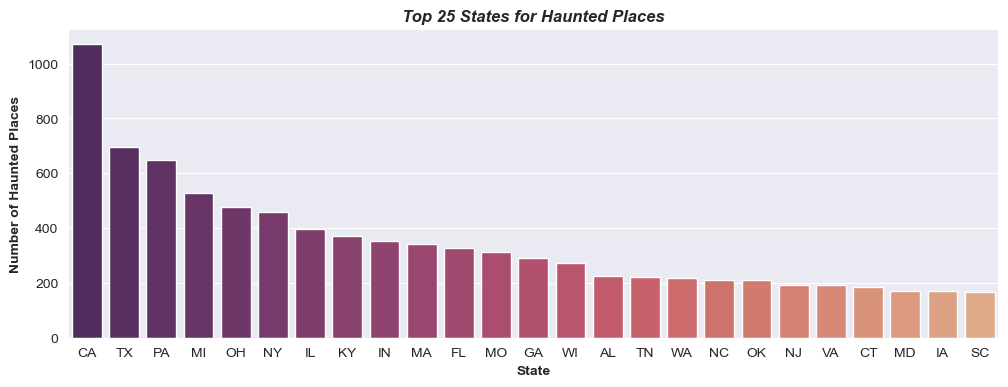

In [47]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set up plot and styles
f, ax = plt.subplots(figsize=(12, 4))
plt.subplots_adjust(hspace=0.3, wspace=0.5)
sns.set_style('darkgrid')
sns.despine()

# Set up filter for states to be in descending order
top_states = haunted_places['state_abbrev'].value_counts().head(25).index

# establish the plot
sns.countplot(x="state_abbrev", data=haunted_places, palette="flare_r", order=top_states, ax=ax)
ax.set_title('Top 25 States for Haunted Places', fontsize=12, weight='bold', style='italic', y=1)
ax.set_xlabel('State', weight='bold')
ax.set_ylabel('Number of Haunted Places', weight='bold')

plt.show()


<Axes: xlabel='state_abbrev', ylabel='count'>

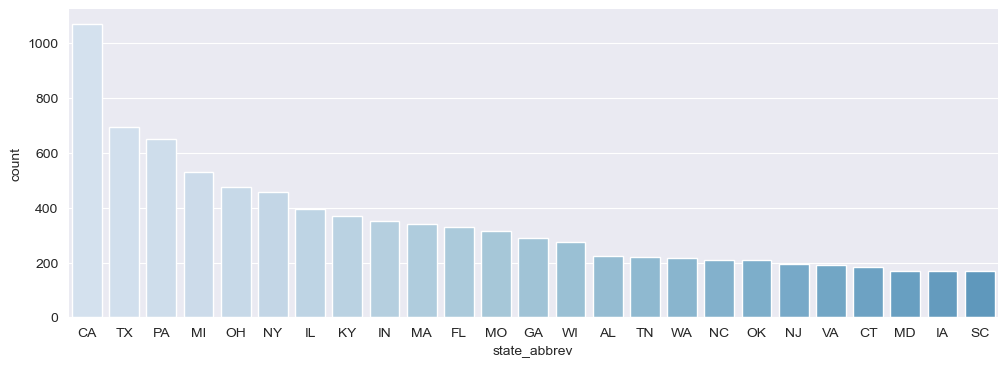

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Set up plot and styles
f, ax = plt.subplots(figsize=(12, 4))
plt.subplots_adjust(hspace=0.3, wspace=0.5)
sns.set_style('darkgrid')
sns.despine()

# Number of unique states or bars you want to plot
n_colors = len(haunted_places["state_abbrev"].unique())

# Create a continuous colormap
colormap = plt.cm.Blues

# Extract the desired number of colors from the colormap
colors = [colormap(i) for i in np.linspace(0.2, 1, n_colors)]

sns.countplot(x="state_abbrev", data=haunted_places, palette=colors, order=top_states, ax=ax)
